# RandomForestClassifier (Iris dataset)

---
* author:  [Prasert Kanawattanachai](prasert.k@chula.ac.th)
* YouTube: https://www.youtube.com/prasertcbs
* github: https://github.com/prasertcbs/scikitlearn_tutorial
* [Chulalongkorn Business School](https://www.cbs.chula.ac.th/en/)
---

In [1]:
from IPython.display import YouTubeVideo
# YouTubeVideo('', width=720, height=405)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
print(f"pandas  version = {pd.__version__}")
print(f"numpy   version = {np.__version__}")
print(f"seaborn version = {sns.__version__}")

pandas  version = 1.1.5
numpy   version = 1.19.2
seaborn version = 0.11.1


In [4]:
pd.Timestamp.now()

Timestamp('2021-01-06 10:43:26.366764')

In [5]:
df=pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/iris.csv')
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
57,4.9,2.4,3.3,1.0,versicolor
122,7.7,2.8,6.7,2.0,virginica
59,5.2,2.7,3.9,1.4,versicolor
86,6.7,3.1,4.7,1.5,versicolor
83,6.0,2.7,5.1,1.6,versicolor
3,4.6,3.1,1.5,0.2,setosa
19,5.1,3.8,1.5,0.3,setosa
65,6.7,3.1,4.4,1.4,versicolor
90,5.5,2.6,4.4,1.2,versicolor
12,4.8,3.0,1.4,0.1,setosa


In [6]:
df.species.value_counts()

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

In [7]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

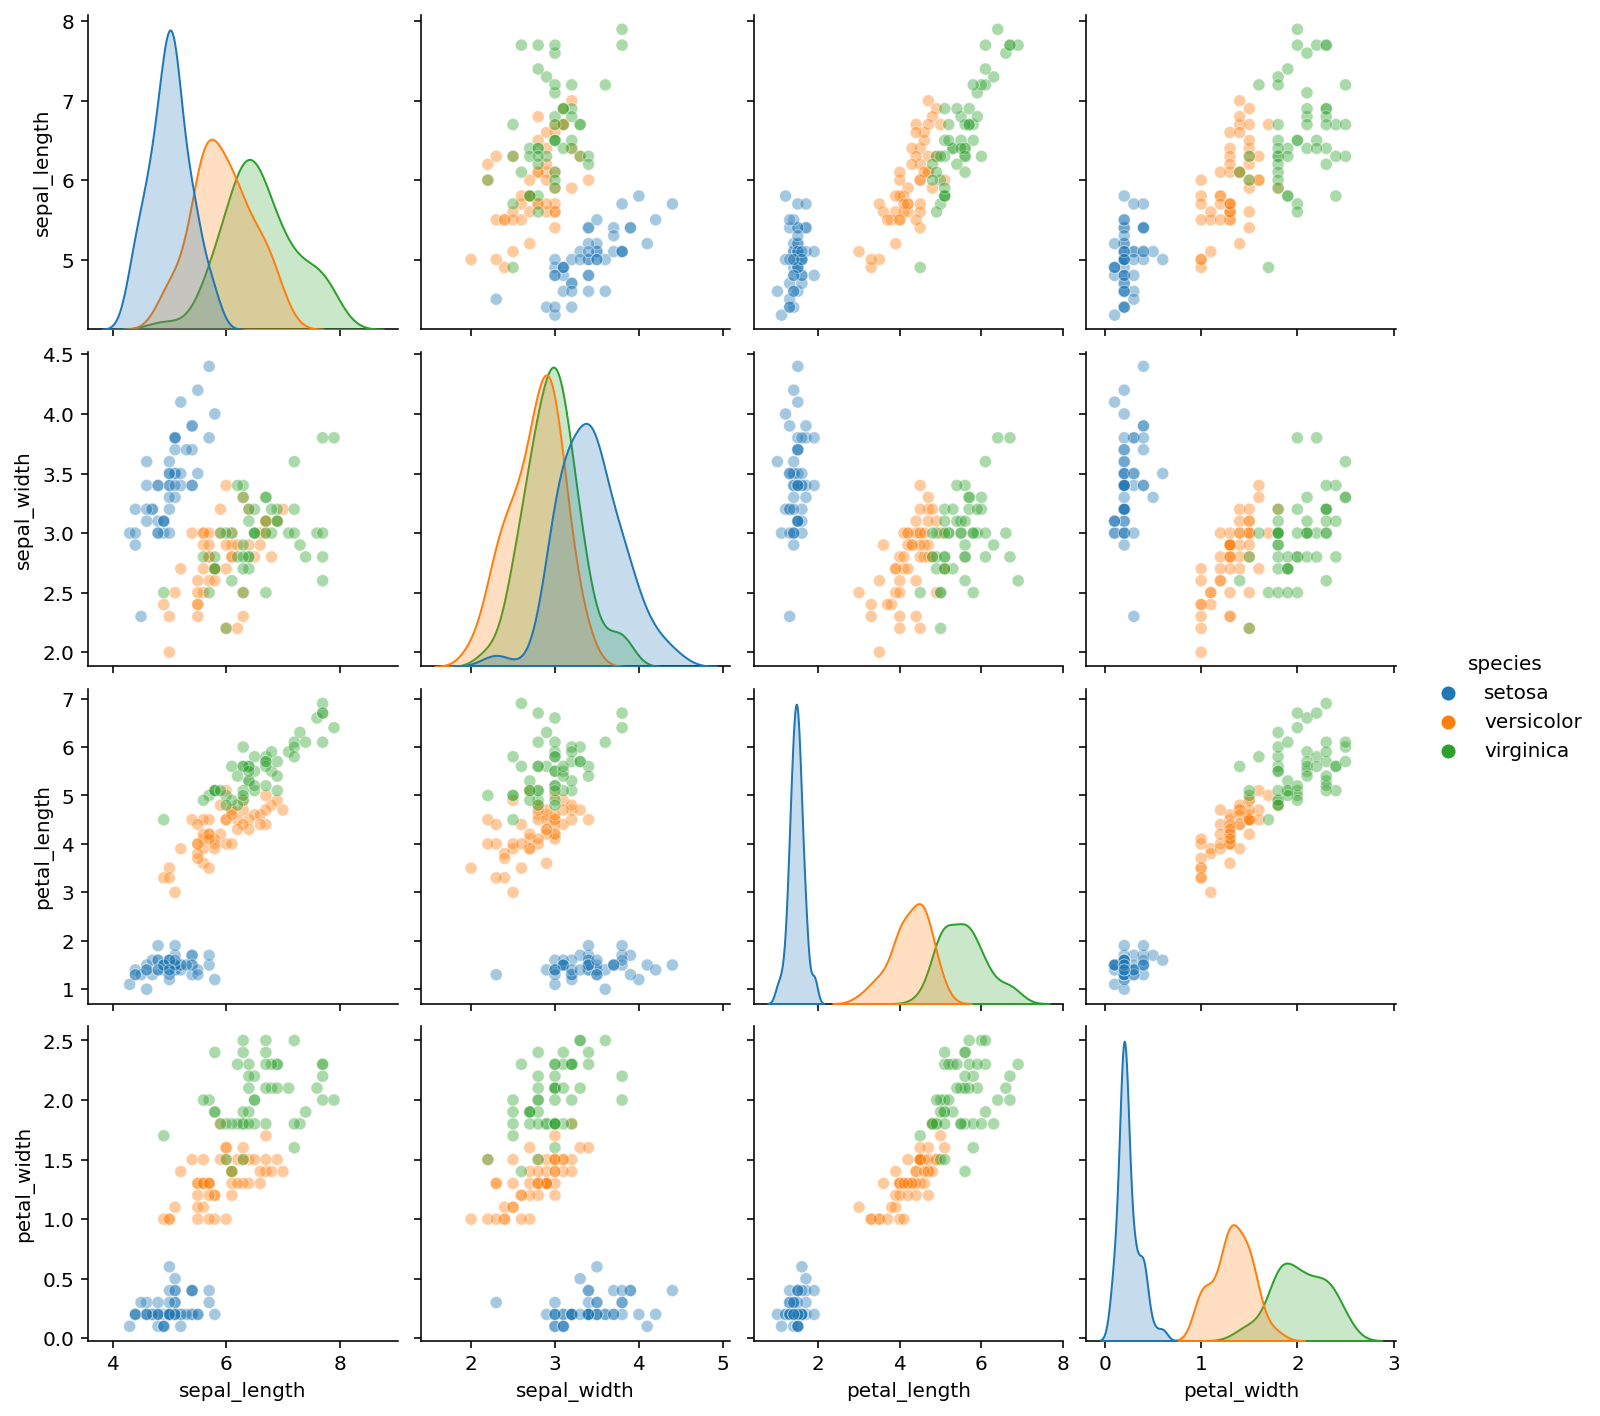

In [8]:
sns.pairplot(df, vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], 
             hue='species', 
#              markers=['o', 'D', '+'],
             plot_kws={'alpha': .4});

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Scikit-learn: Classifier

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, accuracy_score

In [11]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [12]:
test_size=0.2
X_train, X_test, y_train, y_test = train_test_split(
    df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], 
    df.species, 
    test_size=test_size, random_state=7)

In [13]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
126,6.2,2.8,4.8,1.8
79,5.7,2.6,3.5,1.0
22,4.6,3.6,1.0,0.2
139,6.9,3.1,5.4,2.1
74,6.4,2.9,4.3,1.3


In [14]:
y_train.head()

126     virginica
79     versicolor
22         setosa
139     virginica
74     versicolor
Name: species, dtype: object

In [15]:
X_test.head()

,sepal_length,sepal_width,petal_length,petal_width
149,5.9,3.0,5.1,1.8
84,5.4,3.0,4.5,1.5
40,5.0,3.5,1.3,0.3
66,5.6,3.0,4.5,1.5
106,4.9,2.5,4.5,1.7


# Scikit-learn: RandomForestClassifier

In [16]:
model = RandomForestClassifier(n_estimators=10)
model

RandomForestClassifier(n_estimators=10)

In [17]:
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [18]:
model.score(X_train, y_train)

1.0

In [19]:
model.score(X_test, y_test)

0.8666666666666667

In [20]:
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
46,5.1,3.8,1.6,0.2,setosa
53,5.5,2.3,4.0,1.3,versicolor
106,4.9,2.5,4.5,1.7,virginica
96,5.7,2.9,4.2,1.3,versicolor
93,5.0,2.3,3.3,1.0,versicolor
42,4.4,3.2,1.3,0.2,setosa
133,6.3,2.8,5.1,1.5,virginica
33,5.5,4.2,1.4,0.2,setosa
13,4.3,3.0,1.1,0.1,setosa
7,5.0,3.4,1.5,0.2,setosa


In [21]:
model.predict([
    [3, 4, 5, 6],
    [3, 4, 5, 2],
    [5, 3.5, 1.5, .2]
              ])

array(['virginica', 'virginica', 'setosa'], dtype=object)

In [22]:
y_pred=model.predict(X_test)

In [23]:
cm=confusion_matrix(y_test, y_pred)
cm

array([[ 7,  0,  0],
       [ 0, 10,  2],
       [ 0,  2,  9]])

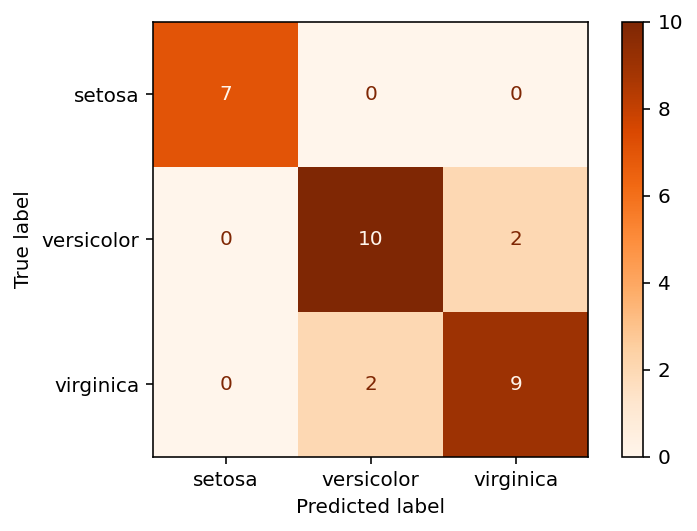

In [24]:
plot_confusion_matrix(model, X_test, y_test, cmap='Oranges')

In [25]:
print(accuracy_score(y_test, y_pred))

0.8666666666666667


In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         7
  versicolor       0.83      0.83      0.83        12
   virginica       0.82      0.82      0.82        11

    accuracy                           0.87        30
   macro avg       0.88      0.88      0.88        30
weighted avg       0.87      0.87      0.87        30



# Scikit-learn: KNeighborsClassifier

In [27]:
model = KNeighborsClassifier()
model

KNeighborsClassifier()

In [28]:
model.fit(X_train, y_train)

KNeighborsClassifier()

In [29]:
model.score(X_train, y_train)

0.9833333333333333

In [30]:
model.score(X_test, y_test)

0.9

In [31]:
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
140,6.7,3.1,5.6,2.4,virginica
109,7.2,3.6,6.1,2.5,virginica
33,5.5,4.2,1.4,0.2,setosa
26,5.0,3.4,1.6,0.4,setosa
113,5.7,2.5,5.0,2.0,virginica
31,5.4,3.4,1.5,0.4,setosa
70,5.9,3.2,4.8,1.8,versicolor
42,4.4,3.2,1.3,0.2,setosa
141,6.9,3.1,5.1,2.3,virginica
134,6.1,2.6,5.6,1.4,virginica


In [32]:
model.predict([
    [3, 4, 5, 6],
    [3, 4, 5, 2],
    [5, 3.5, 1.5, .2]
              ])

array(['virginica', 'versicolor', 'setosa'], dtype=object)

* https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
* https://en.wikipedia.org/wiki/Confusion_matrix

In [33]:
y_pred = model.predict(X_test)
y_pred

array(['virginica', 'versicolor', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'versicolor', 'virginica', 'virginica', 'setosa', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'virginica'],
      dtype=object)

In [34]:
dx=pd.DataFrame({'y_true': y_test, 'y_pred': y_pred})
dx[dx.y_true != dx.y_pred]

,y_true,y_pred
106,virginica,versicolor
77,versicolor,virginica
119,virginica,versicolor


In [35]:
cm=confusion_matrix(y_test, y_pred)
cm

array([[ 7,  0,  0],
       [ 0, 11,  1],
       [ 0,  2,  9]])

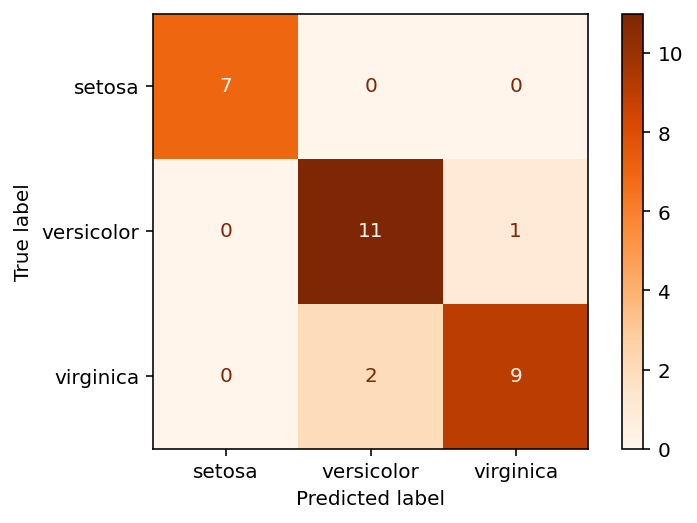

In [36]:
plot_confusion_matrix(model, X_test, y_test, cmap='Oranges')

In [37]:
labels=df.species.unique()
dcm=pd.DataFrame(cm, index=labels, columns=labels)
dcm

,setosa,versicolor,virginica
setosa,7,0,0
versicolor,0,11,1
virginica,0,2,9


In [38]:
def grandtotal(df):
    '''
    add grand total to sklearn confusion matrix dataframe
    '''
    index_labels=df.index.tolist()
    df=df.append(df.sum(axis=0), ignore_index=True)
    df.index=index_labels + ['total']
    df['total']=df.sum(axis=1)
    return df

In [39]:
grandtotal(dcm)

,setosa,versicolor,virginica,total
setosa,7,0,0,7
versicolor,0,11,1,12
virginica,0,2,9,11
total,7,13,10,30


In [40]:
print(accuracy_score(y_test, y_pred))

0.9


In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         7
  versicolor       0.85      0.92      0.88        12
   virginica       0.90      0.82      0.86        11

    accuracy                           0.90        30
   macro avg       0.92      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



## Logistic Regression

In [42]:
model_b = LogisticRegression()
model_b

LogisticRegression()

In [43]:
model_b.fit(X_train, y_train)

/Users/prasert/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [44]:
model_b.score(X_train, y_train)

0.9916666666666667

In [45]:
model_b.score(X_test, y_test)

0.8666666666666667

In [46]:
y_pred_b = model_b.predict(X_test)
y_pred_b

array(['virginica', 'versicolor', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'virginica', 'virginica', 'setosa', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'virginica'],
      dtype=object)

In [47]:
print(confusion_matrix(y_test, y_pred_b))

[[ 7  0  0]
 [ 0 10  2]
 [ 0  2  9]]


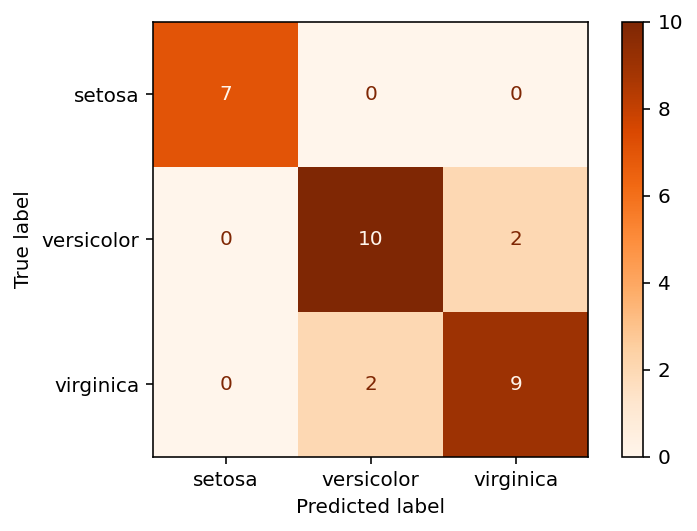

In [48]:
plot_confusion_matrix(model_b, X_test, y_test, cmap='Oranges')

In [49]:
print(accuracy_score(y_test, y_pred_b))

0.8666666666666667


In [50]:
print(classification_report(y_test, y_pred_b))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         7
  versicolor       0.83      0.83      0.83        12
   virginica       0.82      0.82      0.82        11

    accuracy                           0.87        30
   macro avg       0.88      0.88      0.88        30
weighted avg       0.87      0.87      0.87        30

